# CNN

In this notebook, we will go through basics of CNN using MNIST dataset.

Here we will use [keras](https://keras.io  "Keras Tutorial").


Hey yo, but what is CNN?

Everything is explained in-detail in [blog post](https://dudeperf3ct.github.io/cnn/mnist/2018/10/17/Force-of-Convolutional-Neural-Networks/). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/DL_notebooks/blob/master/CNN/mnist_cnn_keras.ipynb)

In [0]:
# load all the required libraries

import numpy as np                                    # package for computing
from sklearn.model_selection import train_test_split  # split dataset
import keras                                          # import keras with tensorflow as backend
from keras.datasets import mnist                      # import mnist dataset from keras 
from keras.models import Model, Sequential            # sequential and functional api keras 
from keras.layers import Dense, Input, Conv2D
from keras.layers import Dropout, Flatten, MaxPooling2D # dense and input layer for constructing mlp

import matplotlib.pyplot as plt             # matplotlib library for plotting

# display plots inline (in notebook itself)
%matplotlib inline                          

Using TensorFlow backend.


In [0]:
# load mnist data

# the data, split between train and validation sets
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# #orginally shape (60000, 28, 28) for train and (10000, 28, 28) for test

# As image is grayscale it has values from [0-255] which we will visualize below
# convert dtype to float32 and scale the data from [0-255] to [0-1]
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

print('Training samples and shape:', train_x.shape[0], train_x.shape)
print('Test samples and shape:', test_x.shape[0], test_x.shape)

11493376/11490434 [==============================] - 2s 0us/step
Training samples and shape: 60000 (60000, 28, 28)
Test samples and shape: 10000 (10000, 28, 28)


# 

From the previous post, we learned how to split dev and test data.
Here, we keep the dimensions of the data same.




In [0]:
# we will split val into --> 20% val set and 80% test set 
# stratify ensures the distribution of classes is same in both the sets

val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.8, stratify=test_y)

print ('Validation samples and shape', val_x.shape[0], val_x.shape)
print ('Test samples and shape', test_x.shape[0], test_x.shape)

Validation samples and shape 2000 (2000, 28, 28)
Test samples and shape 8000 (8000, 28, 28)


## Visualization of data

Enough talk, show me the data!

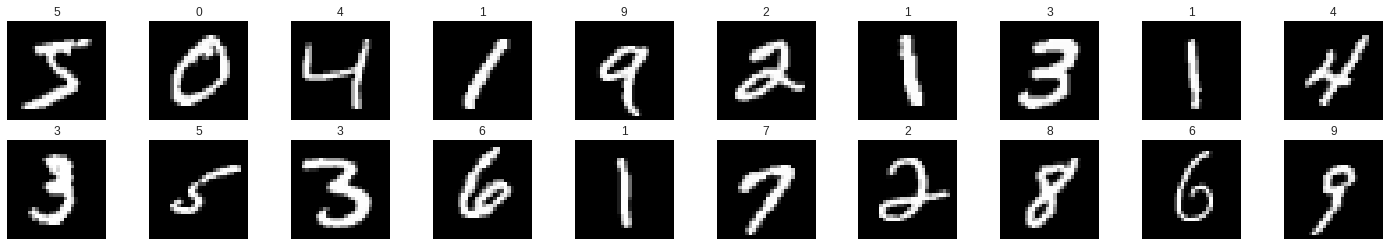

In [0]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(train_x[idx], cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(train_y[idx]))

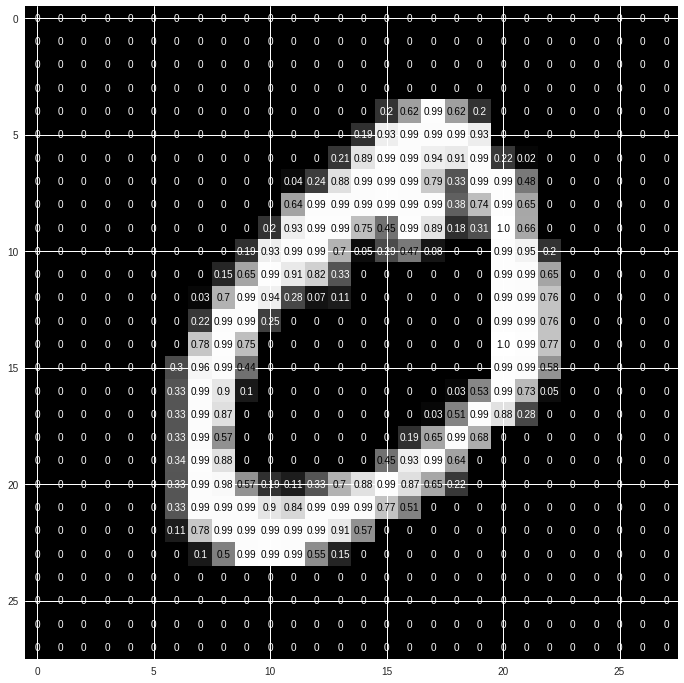

In [0]:
img = train_x[1]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

# Keras

## Sequential API

In [0]:
# [0-9] unique labels
batch_size = 256
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 1)
val_x = val_x.reshape(val_x.shape[0], img_rows, img_cols, 1)
test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 1)
print ('Training data shape', train_x.shape)

Training data shape (60000, 28, 28, 1)


In [0]:
# convert class vectors to binary class matrices
train_y = keras.utils.to_categorical(train_y, num_classes)
val_y = keras.utils.to_categorical(val_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)
print ('Training labels shape:', train_y.shape)

Training labels shape: (60000, 10)


In [0]:
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))                 # Input --> (28x28x1)      Output --> (26x26x32)
model.add(Conv2D(64, (3, 3), activation='relu'))           # Input --> (26x26x32)     Output --> (24x24x64)
model.add(MaxPooling2D(pool_size=(2, 2)))                  # Input --> (24x24x64)     Output --> (12x12x64)
model.add(Dropout(0.25))                                   # Input --> (12x12x64)     Output --> (12x12x64)
model.add(Flatten())                                       # Input --> (12x12x64)     Output --> (9216)
model.add(Dense(128, activation='relu'))                   # Input --> (9216)         Output --> (128)
model.add(Dropout(0.5))                                    # Input --> (128)          Output --> (128)
model.add(Dense(num_classes, activation='softmax'))        # Input --> (128)          Output --> (10)

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val_x, val_y))

Train on 60000 samples, validate on 2000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.3074 - acc: 0.9066 - val_loss: 0.0626 - val_acc: 0.9805
Epoch 2/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0948 - acc: 0.9716 - val_loss: 0.0407 - val_acc: 0.9855
Epoch 3/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0701 - acc: 0.9792 - val_loss: 0.0313 - val_acc: 0.9880
Epoch 4/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0556 - acc: 0.9828 - val_loss: 0.0339 - val_acc: 0.9895
Epoch 5/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.0467 - acc: 0.9857 - val_loss: 0.0235 - val_acc: 0.9920


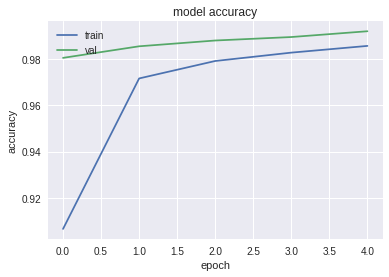

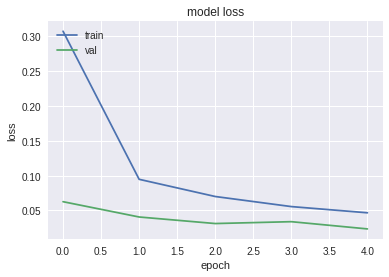

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029314253937038303
Test accuracy: 0.991125


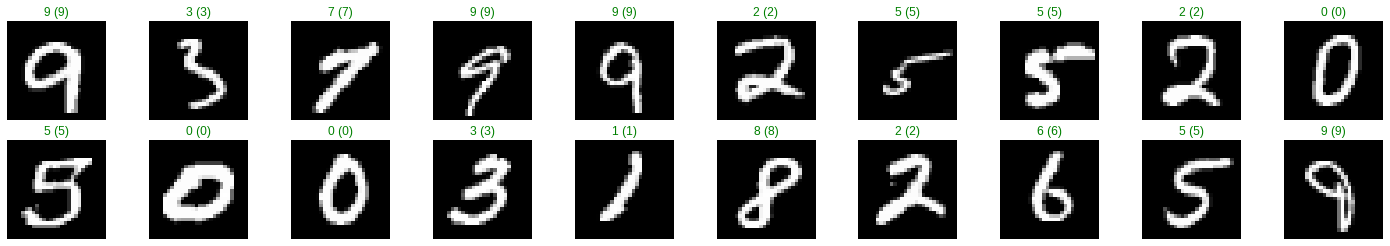

In [0]:
# obtain one batch of test images
images, labels = test_x[:32], test_y[:32]

# get sample outputs
predict = model.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

Text(0.5,1,'99.98 % accuracy')

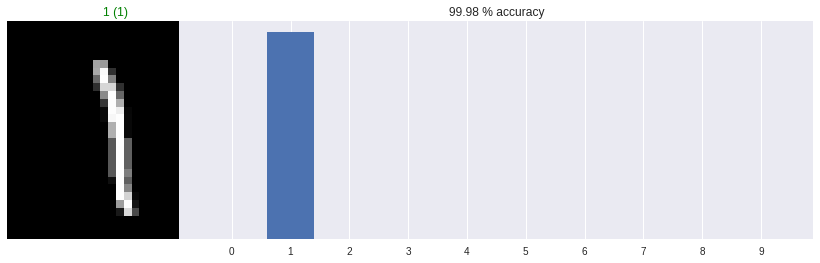

In [0]:
import random

random_idx = random.randint(0, len(test_x))

# get sample outputs
predict = model.predict(test_x[None, random_idx])
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(test_y, axis=1)


# plot the images one example, along with predicted and true labels and probabilities
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(test_x[random_idx].reshape((28, 28)), cmap='gray')
ax.set_title("{} ({})".format(str(preds[0]), str(labels[random_idx])),
             color=("green" if preds[0]==labels[random_idx] else "red"))
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
x_labels = np.arange(10)
ax.bar(np.arange(10), height=np.squeeze(predict), tick_label=x_labels)
ax.set_title("{:.2f} % accuracy".format(float(np.max(predict, axis=1)*100)))

## Functional API

In [0]:
# [0-9] unique labels
batch_size = 256
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
input_shape = (img_rows, img_cols, 1)

inputs = Input(shape=input_shape)                                # Input --> (28x28x1)    Output --> (28x28x1)
x = Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)(inputs)                # Input --> (28x28x1)    Output --> (26x26x32)
x = Conv2D(64, (3, 3), activation='relu')(x)                     # Input --> (26x26x32)   Output --> (24x24x64)
x = MaxPooling2D(pool_size=(2, 2))(x)                             # Input --> (24x24x64)   Output --> (12x12x64)
x = Dropout(0.25)(x)                                             # Input --> (24x24x64)   Output --> (12x12x64)
x = Flatten()(x)                                                 # Input --> (12x12x64)   Output --> (9216)
x = Dense(128, activation='relu')(x)                             # Input --> (9216)       Output --> (128)
x = Dropout(0.5)(x)                                              # Input --> (128)        Output --> (128)
predictions = Dense(num_classes, activation='softmax')(x)        # Input --> (128)        Output --> (10)
                 
model = Model(inputs=inputs, outputs=predictions)

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
                 
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
__________

In [0]:
history = model.fit(train_x, train_y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(val_x, val_y))

Train on 60000 samples, validate on 2000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 168us/step - loss: 0.3122 - acc: 0.9046 - val_loss: 0.0663 - val_acc: 0.9785
Epoch 2/5
60000/60000 [==============================] - 9s 150us/step - loss: 0.0970 - acc: 0.9721 - val_loss: 0.0414 - val_acc: 0.9875
Epoch 3/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.0719 - acc: 0.9790 - val_loss: 0.0335 - val_acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 9s 151us/step - loss: 0.0591 - acc: 0.9812 - val_loss: 0.0308 - val_acc: 0.9910
Epoch 5/5
60000/60000 [==============================] - 9s 154us/step - loss: 0.0509 - acc: 0.9843 - val_loss: 0.0291 - val_acc: 0.9910


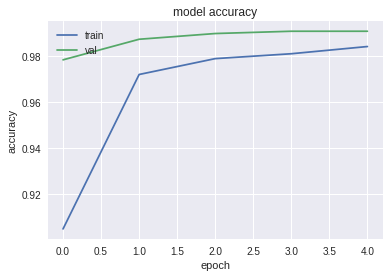

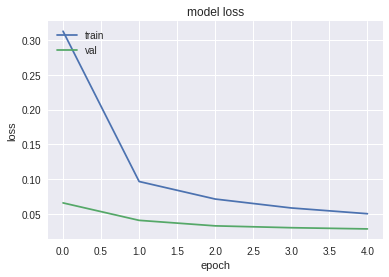

In [0]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03160658916787361
Test accuracy: 0.989375


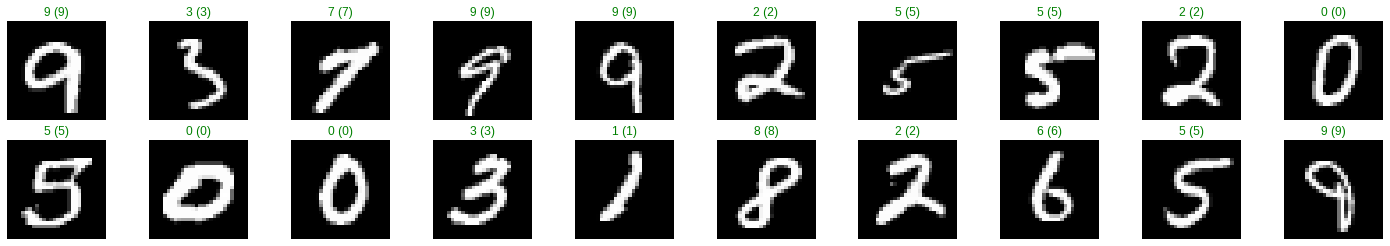

In [0]:
# obtain one batch of test images
images, labels = test_x[:32], test_y[:32]

# get sample outputs
predict = model.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

Text(0.5,1,'100.00 % accuracy')

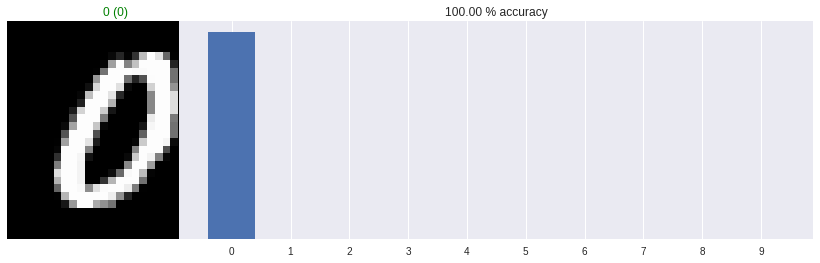

In [0]:
import random

random_idx = random.randint(0, len(test_x))

# get sample outputs
predict = model.predict(test_x[None, random_idx])
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(test_y, axis=1)


# plot the images one example, along with predicted and true labels and probabilities
fig = plt.figure(figsize=(25, 4))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(test_x[random_idx].reshape((28, 28)), cmap='gray')
ax.set_title("{} ({})".format(str(preds[0]), str(labels[random_idx])),
             color=("green" if preds[0]==labels[random_idx] else "red"))
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
x_labels = np.arange(10)
ax.bar(np.arange(10), height=np.squeeze(predict), tick_label=x_labels)
ax.set_title("{:.2f} % accuracy".format(float(np.max(predict, axis=1)*100)))